In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn

from math import floor
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

sns.set()
warn.filterwarnings('ignore')

In [156]:
# Reading data
df1 = pd.read_csv('../data/dataset.csv')
df2 = pd.read_csv('../data/TCS.BO.csv')

# Adding price column to the indicator dataset
n = df1['Date'].size
df2Close = df2['Close'].to_list()
df2Date = df2['Date'].to_list()
prices = []
for i in range(n):
    df1Date = df1['Date'].iloc[i]
    price = df2Close[df2Date.index(df1Date)]
    prices.append(price)

df1['Price'] = prices
features = df1.columns[1:-1]

# Building the final datset to be used throughout
df = pd.concat([df1['Date'],df1['Price'],df1[features]], axis=1)
df.head()

,Date,Price,Volume,AO,ROC_12,ROC_26,ROC_50,ROC_200,EMA_12,EMA_26,...,WILLR_125,VWMA_14,VWMA_20,STOCH_d,STOCH_k,SMA_12,SMA_26,SMA_50,SMA_200,Signal
0,12-11-2002,36.974998,42304,7.932132,1.405545,-1.465698,-12.588655,-3.710945,43.493023,43.816629,...,-97.498357,44.108333,42.767381,0.145167,0.035445,43.116667,43.115866,44.26300,56.377938,WAIT
1,13-11-2002,36.625000,40440,-6.857685,2.268761,-4.498041,-15.561960,-2.104907,42.436404,43.283916,...,-97.959185,43.364286,42.346964,0.035870,0.033248,43.184375,43.049519,44.12800,56.374000,BUY
2,14-11-2002,37.062500,57552,-6.955552,2.382595,-1.133709,-13.582048,-1.690983,41.609649,42.823070,...,-97.383148,42.682262,41.974107,0.034403,0.034516,43.256250,43.033173,44.01150,56.370813,WAIT
3,15-11-2002,37.937500,76520,-6.895258,3.161111,1.369408,-8.639377,-1.043369,41.044703,42.461176,...,-96.231074,42.111191,41.688869,0.035050,0.037384,43.353125,43.052885,43.93975,56.368813,WAIT
4,18-11-2002,38.325001,133176,-6.703199,2.576117,0.590557,-6.008585,-0.583654,40.626287,42.154793,...,-95.720869,41.571548,41.445774,0.037440,0.040419,43.433333,43.061539,43.89075,56.367688,WAIT


In [157]:
n = df['Date'].size
features = ['EMV_50','WILLR_14','STOCH_k','CCI_14','WILLR_20','WILLR_125','RSI_12']
df = df[['Date','Price']+features+['Signal']]
X_train = df[features].iloc[0:floor(n*0.7)]
X_test = df[features].iloc[floor(n*0.7):]
y_train = df['Signal'].iloc[0:floor(n*0.7)]
y_test = df['Signal'].iloc[floor(n*0.7):]

### __Learning and Analysis__

In [158]:
def learnAndPredict(model, X_train, y_train, X_test, model_name, nDays):
    model.fit(X_train, y_train)    # Training
    pred = model.predict(X_test) # Generating signals over test set

    nDays = nDays
    # Visualizing N-days trading plan offered by the model
    fig = plt.figure(figsize=(40,15))
    plt.plot(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays], df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays], '-')
    i = 0
    for x,y in zip(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays],df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays]):
        label = pred[i]
        if(label=='WAIT'): label = ''
        elif(label=='BUY'): 
            label = '{:.2f}(B)'.format(y)
            plt.scatter(x=x, y=y, marker='^', c='g', s=200, alpha=1.0)
            plt.annotate('BUY', (x,y), textcoords='offset points', xytext=(0,10), ha='center', fontsize=18, fontweight='bold')
        else: 
            label = '{:.2f}(S)'.format(y)
            plt.scatter(x=x, y=y, marker='v', c='r', s=200, alpha=1.0)
            plt.annotate('SELL', (x,y), textcoords='offset points', xytext=(0,10), ha='center', fontsize=18, fontweight='bold')
        i = i+1
        if label != '':
            print('{0}: {1}'.format(i,label))
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (in Rs.)')
    plt.title('Trading Plan Offered by {}'.format(model_name), fontsize=24, fontweight='bold')

__1. Logistic Regression__

4: 1328.18(B)
7: 1387.35(S)
9: 1348.18(B)
10: 1321.57(B)
15: 1282.68(B)
23: 1256.68(B)
30: 1322.18(S)
35: 1292.60(B)
36: 1238.10(B)
38: 1213.43(B)
50: 1265.35(S)
75: 1256.03(B)
81: 1297.85(S)
91: 1316.40(S)
94: 1260.70(B)
95: 1235.95(B)


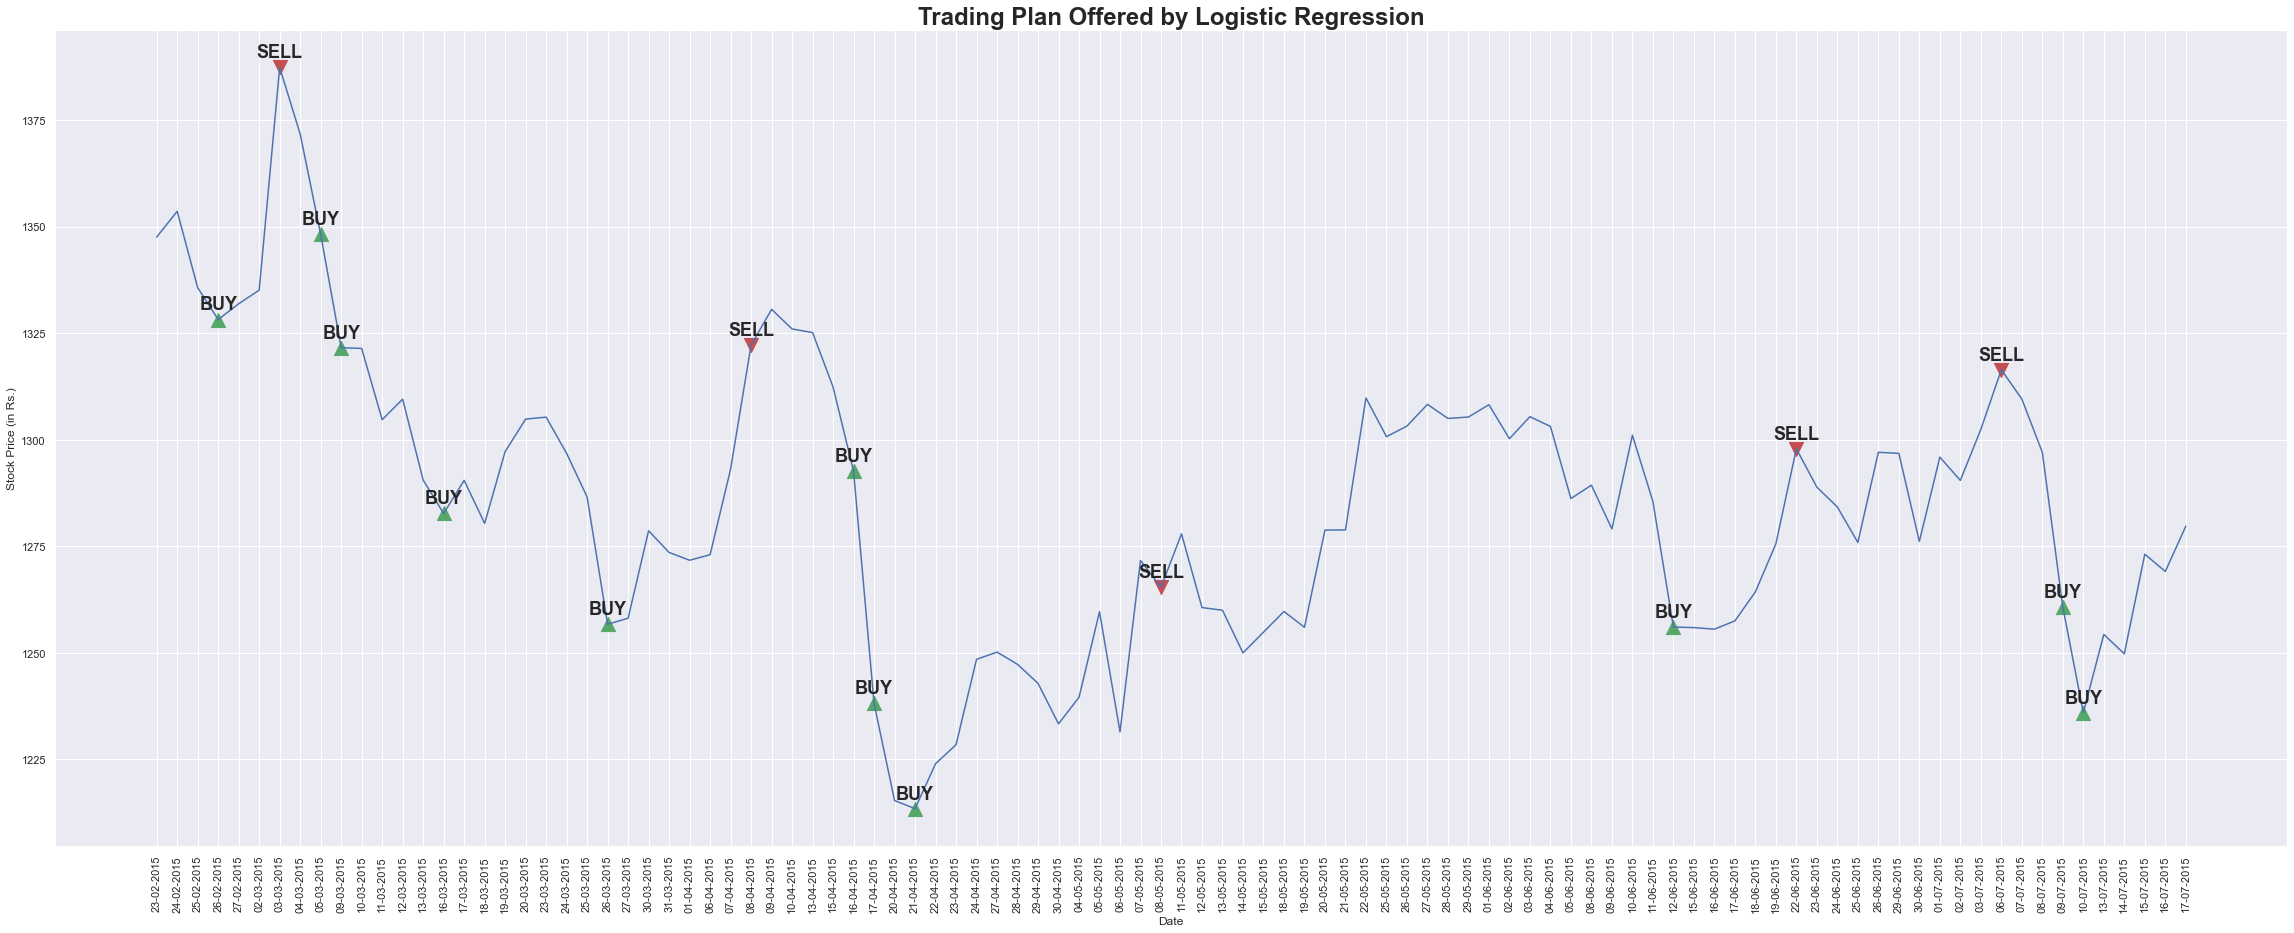

In [159]:
lr = LogisticRegression()   # Instantiating Logistic Regression
learnAndPredict(lr, X_train, y_train, X_test, 'Logistic Regression', 100)

__2. Decision Tree__

1: 1347.53(S)
2: 1353.57(S)
3: 1335.65(B)
4: 1328.18(B)
5: 1331.88(S)
6: 1335.07(B)
7: 1387.35(S)
8: 1371.70(B)
10: 1321.57(B)
11: 1321.40(B)
12: 1304.68(B)
14: 1290.53(B)
17: 1280.35(B)
18: 1297.20(S)
19: 1304.82(S)
20: 1305.28(S)
22: 1286.55(S)
23: 1256.68(B)
24: 1258.10(B)
26: 1273.53(B)
27: 1271.70(S)
28: 1273.00(B)
30: 1322.18(S)
32: 1325.97(S)
35: 1292.60(B)
44: 1242.82(B)
46: 1239.55(B)
49: 1271.65(S)
51: 1277.90(B)
52: 1260.60(B)
54: 1249.97(B)
55: 1254.82(S)
59: 1278.82(B)
62: 1303.18(B)
63: 1308.28(S)
64: 1304.97(S)
65: 1305.30(S)
71: 1289.32(S)
73: 1301.03(B)
74: 1285.50(B)
75: 1256.03(B)
79: 1264.28(B)
85: 1297.03(S)
88: 1295.90(S)
90: 1302.40(S)
93: 1297.03(B)
95: 1235.95(B)
96: 1254.30(S)
97: 1249.75(B)
98: 1273.12(B)
100: 1279.68(S)


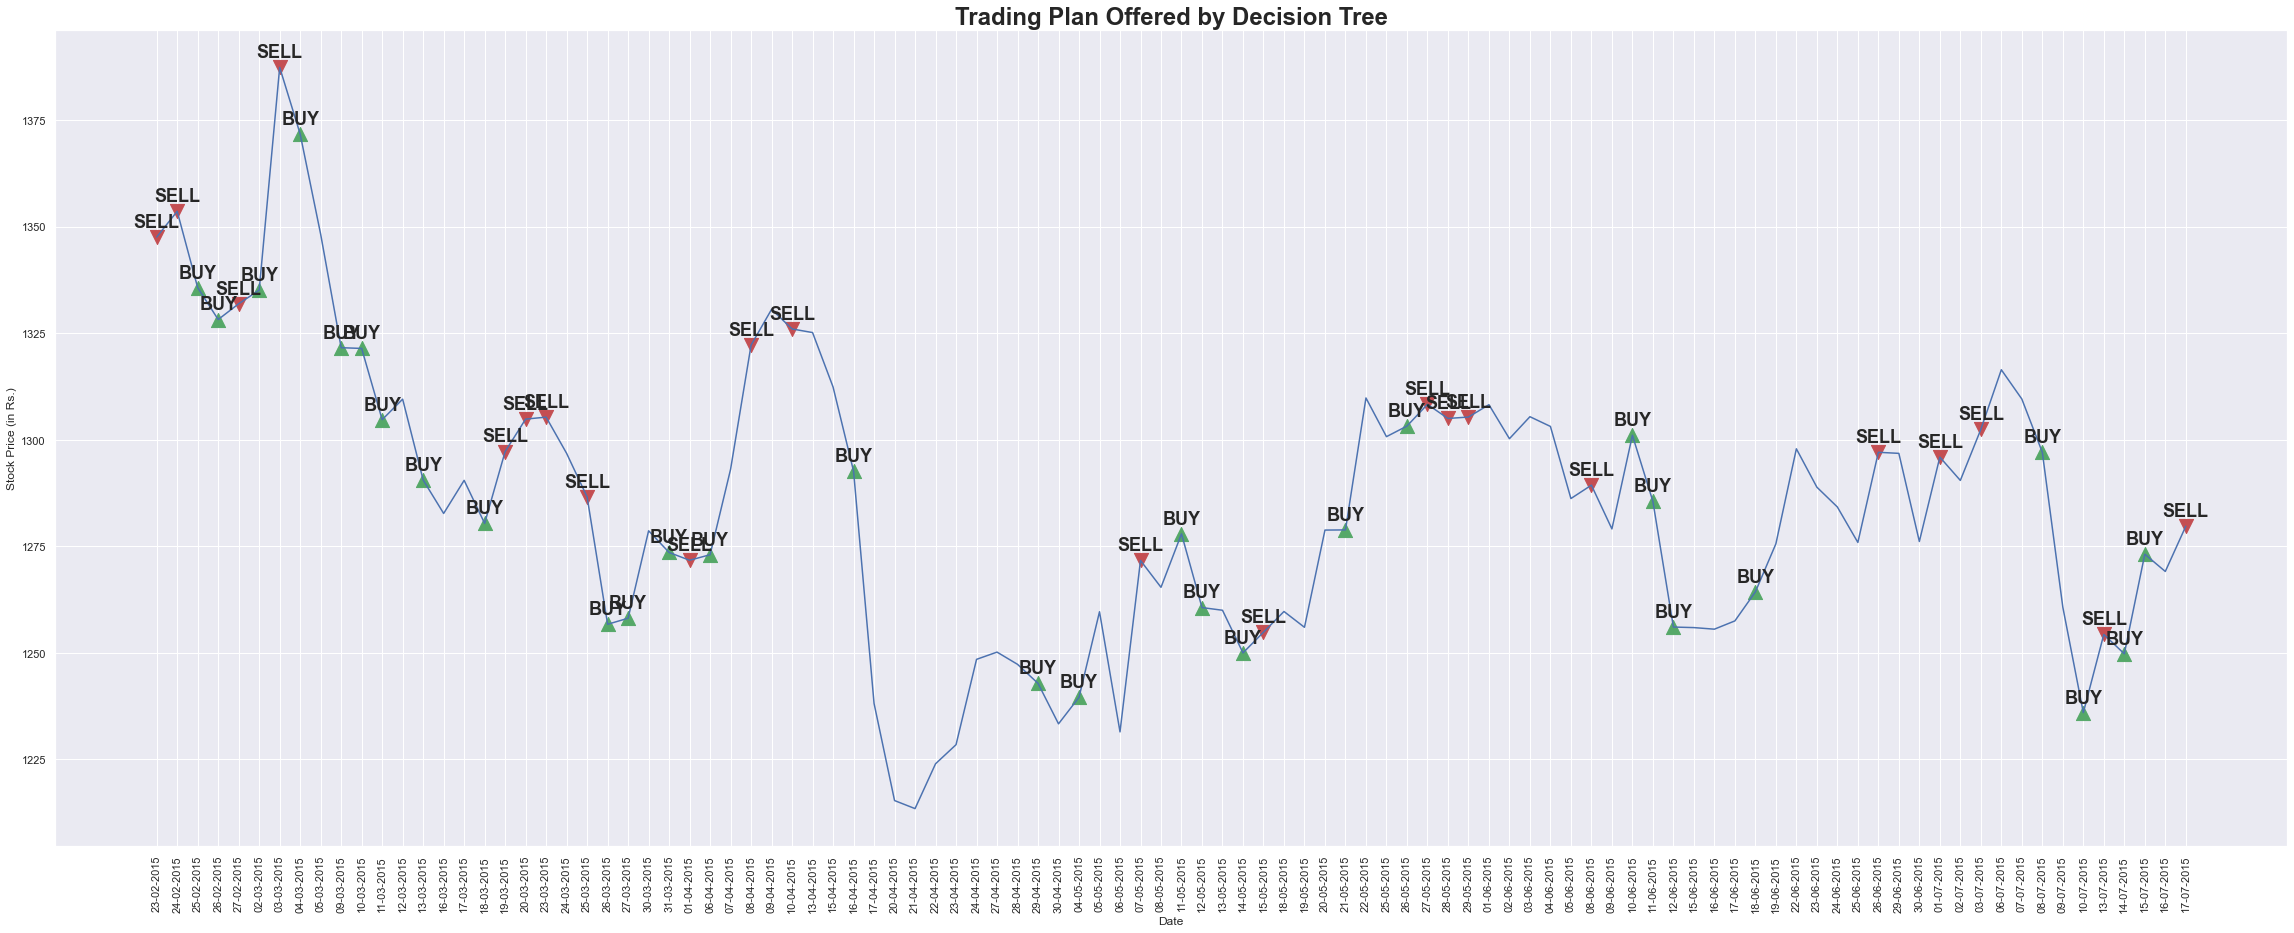

In [160]:
dt = DecisionTreeClassifier()
learnAndPredict(dt, X_train, y_train, X_test, 'Decision Tree', 100)

__3. Random Forest__

7: 1387.35(S)
23: 1256.68(B)
24: 1258.10(B)
34: 1312.35(S)
35: 1292.60(B)
36: 1238.10(B)
38: 1213.43(B)
43: 1247.28(B)
49: 1271.65(S)
54: 1249.97(B)
62: 1303.18(S)
63: 1308.28(S)
74: 1285.50(S)
84: 1275.88(B)
88: 1295.90(S)
95: 1235.95(B)


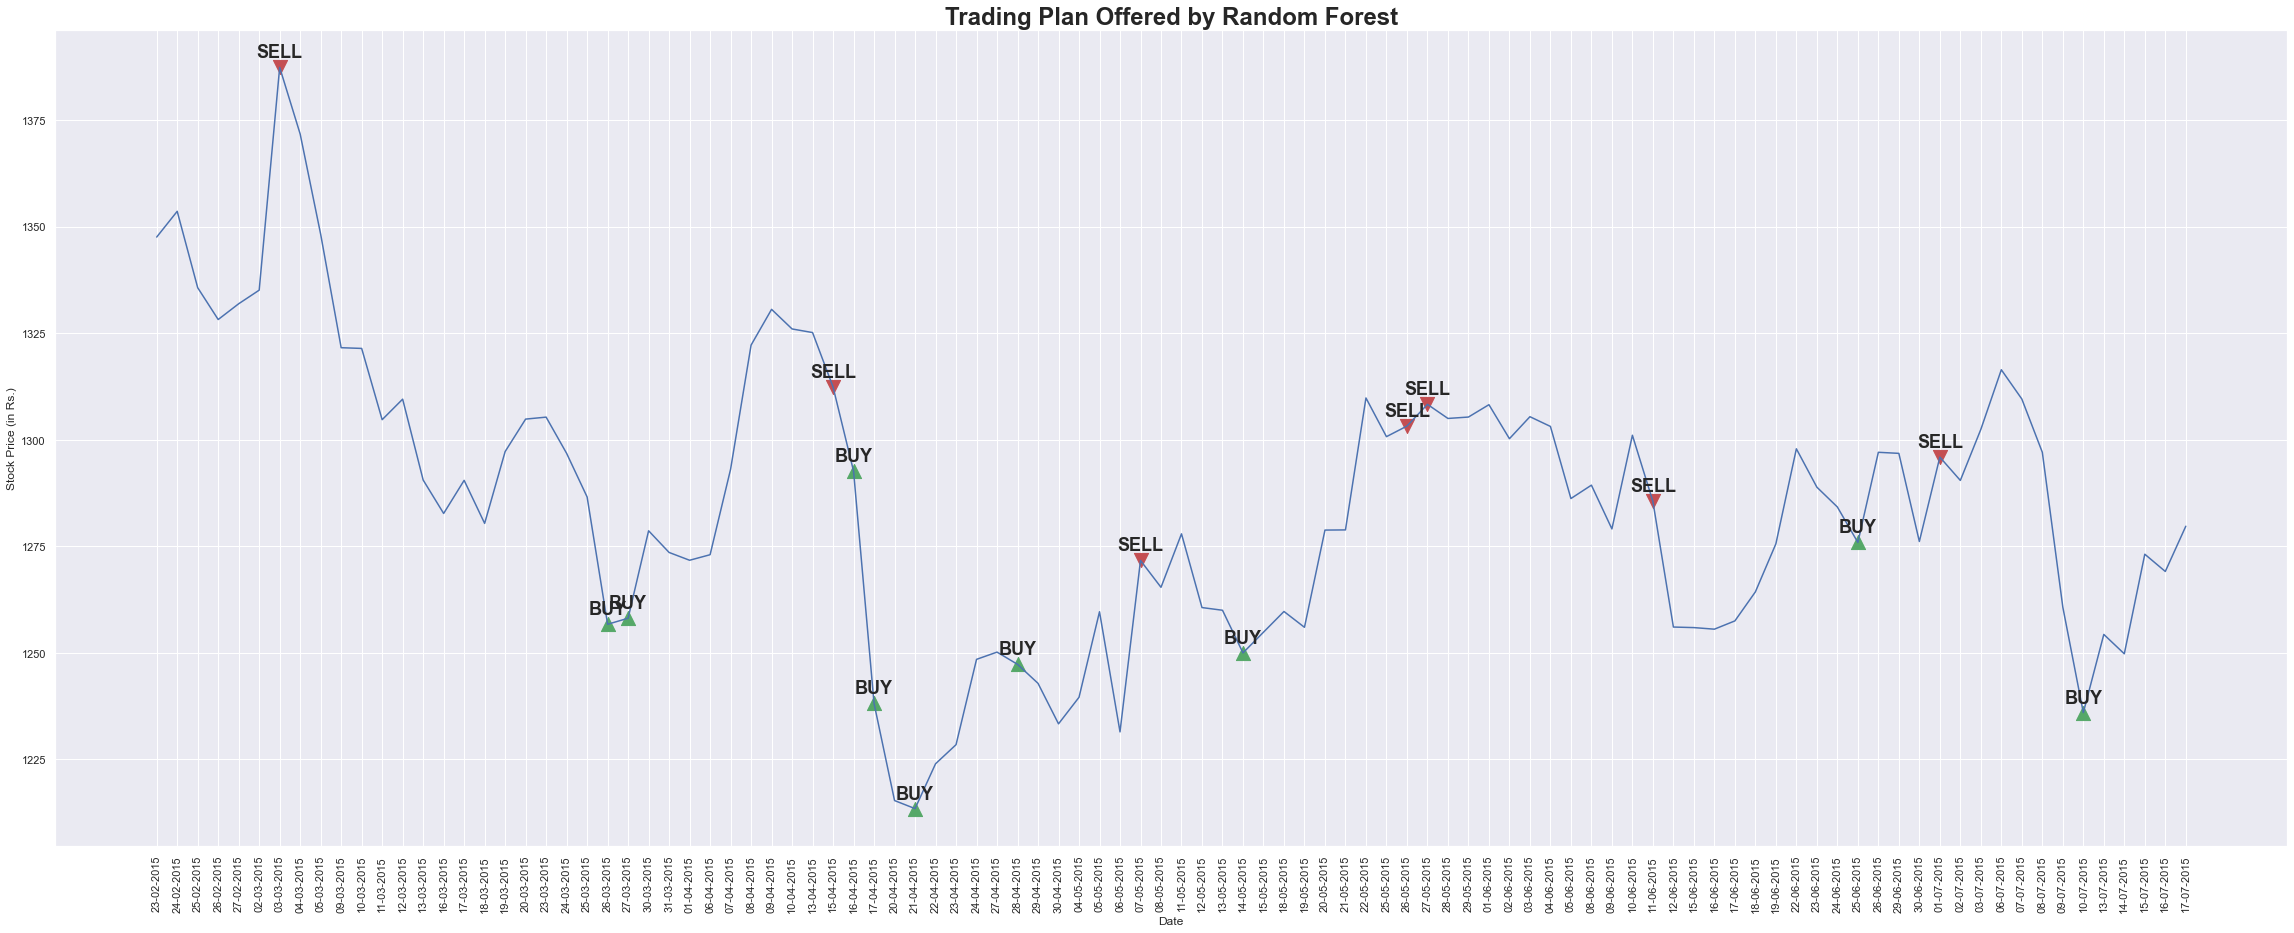

In [161]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=20)
learnAndPredict(rf, X_train, y_train, X_test, 'Random Forest', 100)

__5. Naive Bayes__

1: 1347.53(S)
2: 1353.57(S)
4: 1328.18(B)
6: 1335.07(B)
7: 1387.35(B)
9: 1348.18(B)
10: 1321.57(B)
13: 1309.50(B)
14: 1290.53(B)
15: 1282.68(B)
16: 1290.45(B)
17: 1280.35(B)
21: 1296.78(B)
22: 1286.55(B)
23: 1256.68(B)
24: 1258.10(B)
28: 1273.00(B)
29: 1293.05(B)
30: 1322.18(B)
33: 1325.12(S)
35: 1292.60(B)
36: 1238.10(B)
37: 1215.32(B)
38: 1213.43(B)
39: 1223.95(B)
40: 1228.43(B)
41: 1248.45(B)
43: 1247.28(B)
44: 1242.82(B)
45: 1233.32(B)
46: 1239.55(B)
48: 1231.43(B)
50: 1265.35(B)
53: 1259.97(B)
60: 1309.78(S)
62: 1303.18(S)
63: 1308.28(S)
65: 1305.30(S)
66: 1308.20(S)
72: 1279.05(B)
75: 1256.03(B)
76: 1255.90(B)
77: 1255.53(B)
80: 1275.55(B)
81: 1297.85(B)
90: 1302.40(S)
92: 1309.53(S)
94: 1260.70(B)
95: 1235.95(B)
96: 1254.30(B)
97: 1249.75(B)
98: 1273.12(B)


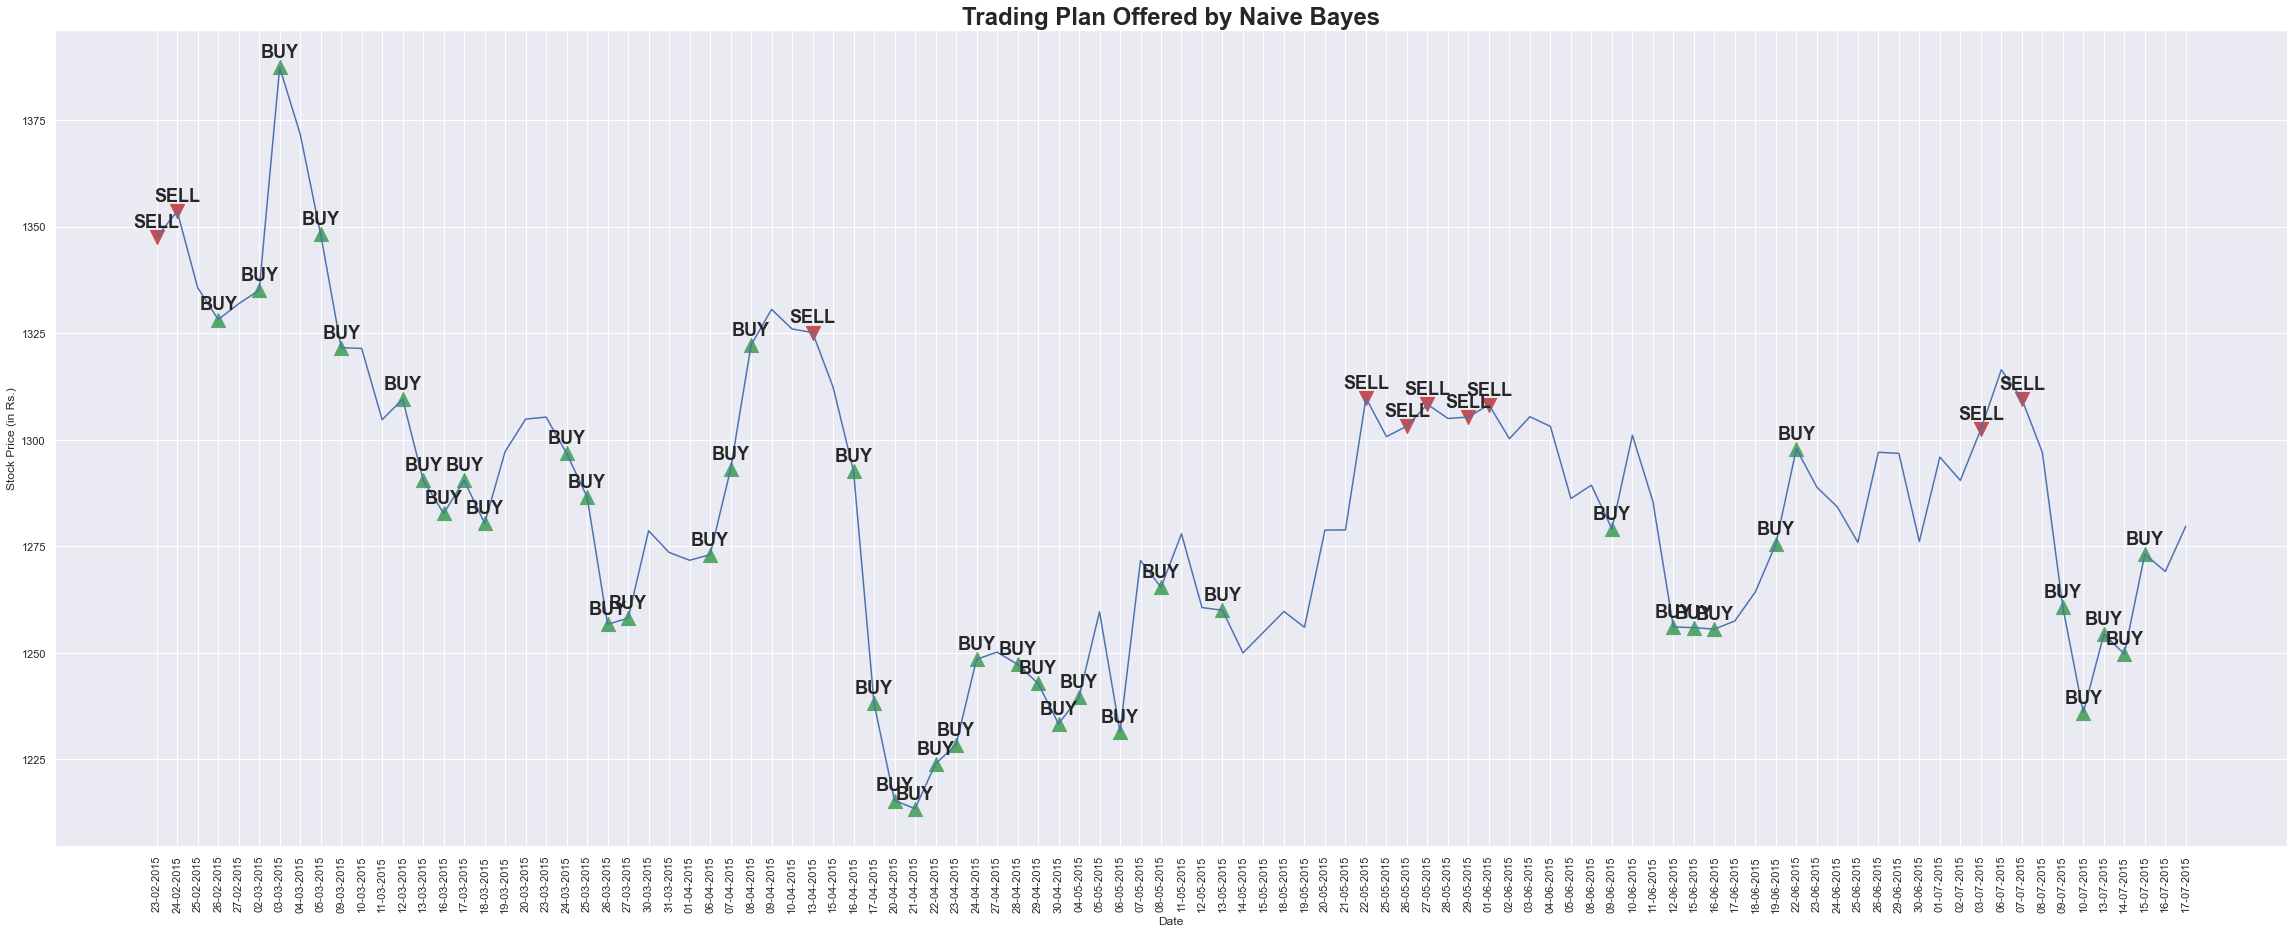

In [162]:
gnb = GaussianNB()
learnAndPredict(gnb, X_train, y_train, X_test, 'Naive Bayes', 100)

__6. Multilayer Perceptron__

2: 1353.57(S)
4: 1328.18(B)
7: 1387.35(S)
9: 1348.18(B)
10: 1321.57(B)
15: 1282.68(B)
23: 1256.68(B)
30: 1322.18(S)
34: 1312.35(B)
35: 1292.60(B)
43: 1247.28(B)
60: 1309.78(S)
63: 1308.28(S)
75: 1256.03(B)
94: 1260.70(B)


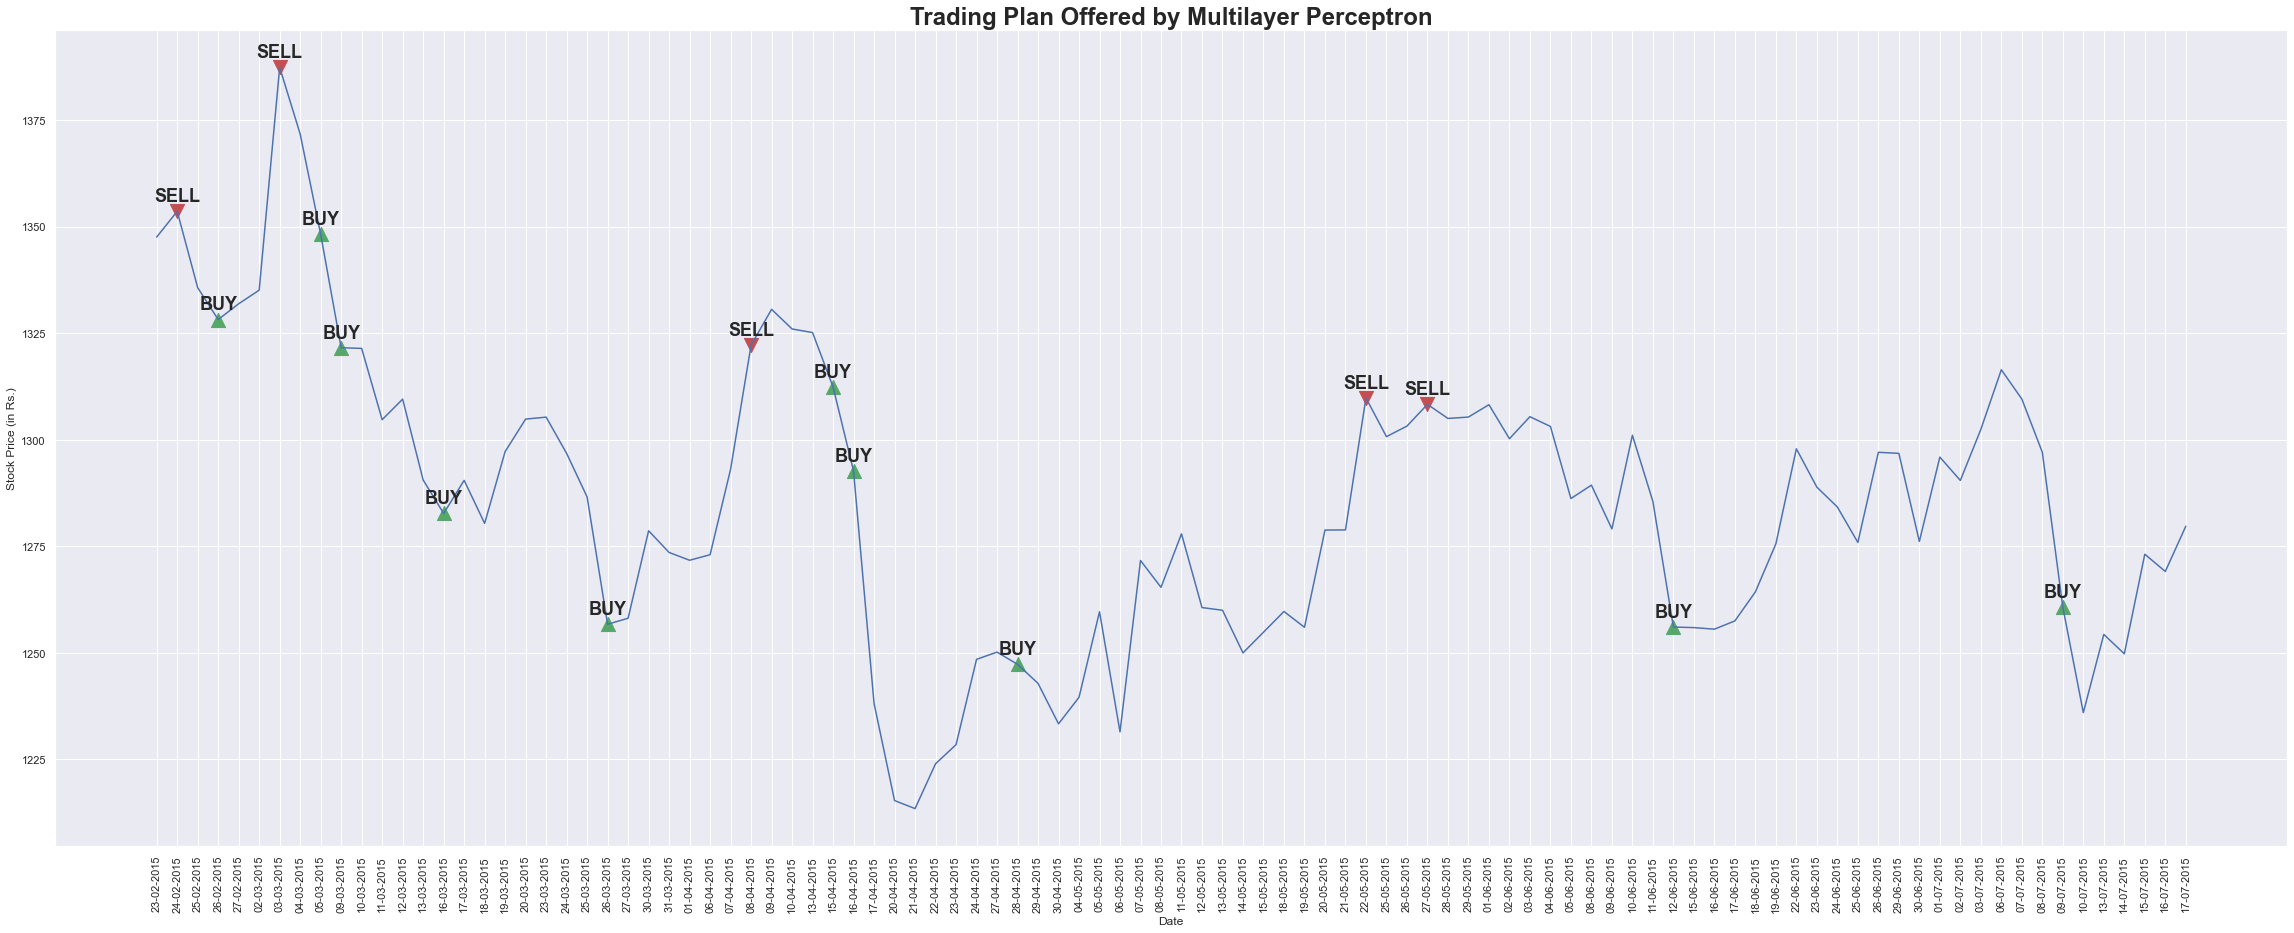

In [163]:
# Normalization parameters for the dataset
# NOTE: MLP works better if the input data follows normal distribution
mu = X_train.mean(axis=0)    
sig = X_train.std(axis=0)
# Normalizing the train and test sets
x_train = (X_train - mu)/sig
x_test = (X_test - mu)/sig

# Instantiating MLP Classifier: (InLayer:10, HL1:7, HL2:14, OutLayer:3)
mlp = MLPClassifier(hidden_layer_sizes=[7,14],activation='logistic',solver='lbfgs',random_state=0)
learnAndPredict(mlp, x_train, y_train, x_test, 'Multilayer Perceptron', 100)